In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import mglearn
import numpy as np
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


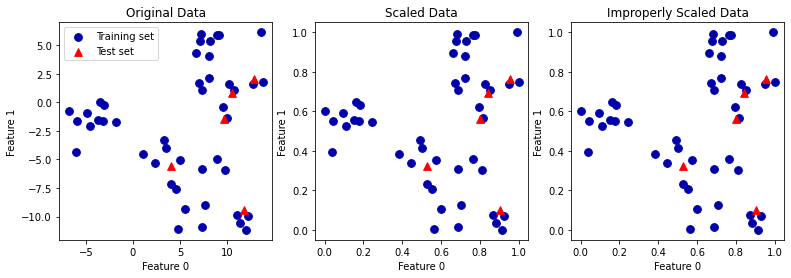

In [15]:
# 合成データセットを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとテストデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c="red", label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c="red", label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 最大値と最小値が０，１になる。　ここでは説明のためにわざとやっている
# 実際にはやってはいけない
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c="red", label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

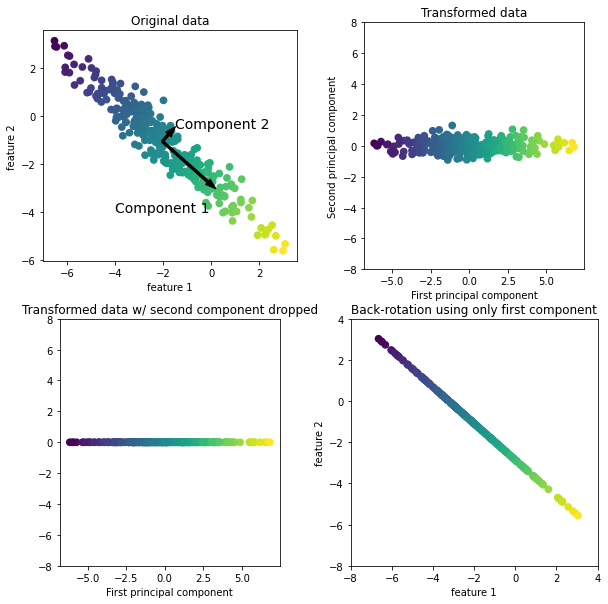

In [16]:
# 次元削除、特徴量抽出、多様体学習について
mglearn.plots.plot_pca_illustration()

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal componrnt')

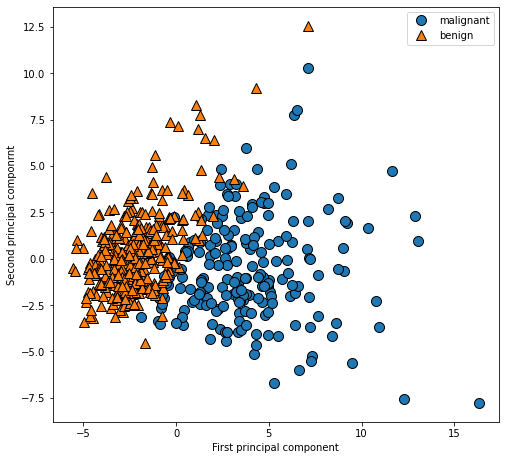

In [24]:
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# データの最初の２つの主成分だけ維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の２つの主成分に対してでえーたポイントを変換
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

# 第一成分と第二成分によるプロット。　クラスごとに色分け
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal componrnt")

Text(0, 0.5, 'Principal components')

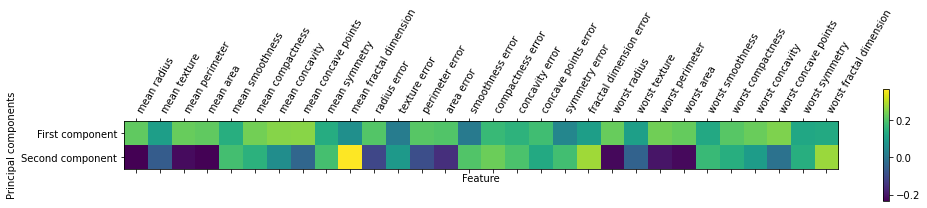

In [25]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")